# 1. Import Library

In [167]:
from keras.datasets import cifar100
import numpy as np
from keras.utils import np_utils

np.random.seed(10)

# 資料準備

In [168]:
# 要訓練的類別索引列表
selected_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [169]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar100.load_data()

自動下載data set

In [170]:
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


順序標記訓練集和測試集的(資料數量,形狀和通道數量)
例:(50000筆,像素32*32,RGB圖片通道為3)

In [171]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [172]:
# 根據選取的類別索引篩選出對應的訓練樣本和標籤
selected_classes = [i for i in range(15)]
selected_train_samples = np.where(np.isin(y_label_train, selected_classes))[0]
x_img_train_selected = x_img_train_normalize[selected_train_samples]
y_label_train_selected = y_label_train[selected_train_samples]
y_label_train_selected_OneHot = np_utils.to_categorical(y_label_train_selected, len(selected_classes))

selected_test_samples = np.where(np.isin(y_label_test, selected_classes))[0]
x_img_test_selected = x_img_test_normalize[selected_test_samples]
y_label_test_selected = y_label_test[selected_test_samples]
y_label_test_selected_OneHot = np_utils.to_categorical(y_label_test_selected, len(selected_classes))


因為圖片像素數據以0到255表達，因此將數據(圖片)除以255,進行標準化,提高準確率

In [173]:
# from keras.utils import np_utils
# # 將標籤轉換為 One-Hot Encoding 格式
# y_label_train_OneHot = np_utils.to_categorical(y_label_train_selected)
# y_label_test_OneHot = np_utils.to_categorical(y_label_test_selected)


將圖片預先做好的標籤欄位轉換為Onehot encoding,方便後續繪制圖表時直接代入標籤文字

In [174]:
# y_label_test_OneHot.shape

執行結果,數量為被處理的圖片數量

# 建立模型

In [175]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [176]:
model = Sequential()

建立一個Sequential線性堆疊模型,往下便可以直接順序加入模型

In [177]:
#卷積層1

In [178]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

filters:隨機產生32個濾鏡filters weight

kernel size(3,3):每一個濾鏡3*3大小

input shape:輸入圖像格式,Cifar資料集像素為32*32,RGB的三原色通道為3

activation:使用relu激活函數

padding:設定讓卷積運算後的影像大小不變

In [179]:
model.add(Dropout(rate=0.25))

每次訓練迭代會隨機放棄神經網路中的25%神經元,避免overfitting

In [180]:
model.add(MaxPooling2D(pool_size=(2, 2)))

建立池化層,(2,2)的意思為將(32,32)除以(2,2),把影像縮小為(16,16),但是數量仍保持32個

In [181]:
#卷積層2與池化層2

In [182]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [183]:
model.add(Dropout(0.25))

In [184]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [185]:
#Step3	建立神經網路(平坦層、隱藏層、輸出層)

In [186]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

建立平坦層,8x8x64=4096,剛好等於上一個池化層的神經元數量,

並在每次訓練迭代放棄25%的神經元

In [187]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

建立隱藏層,共1024個神經元

In [188]:
model.add(Dense(15, activation='softmax'))

建立輸出層,共10個神經元,對應10個影像分類,使用softmax激活函數進行轉換,

讓結果轉換成預測每一個影像的機率

In [189]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_24 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_25 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

# 載入之前訓練的模型

In [190]:
try:
    model.load_weights("SaveModel/cifarCnnModelnew1.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [191]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

設定損失函數,在深度學習中通常會使用cross entropy交叉熵,訓練效果較好

In [192]:
train_history=model.fit(x_img_train_selected, y_label_train_selected_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)          

Epoch 1/10
47/47 [==============================] - 3s 19ms/step - loss: 2.5881 - accuracy: 0.1655 - val_loss: 2.2537 - val_accuracy: 0.3433
Epoch 2/10
47/47 [==============================] - 1s 13ms/step - loss: 2.0259 - accuracy: 0.3550 - val_loss: 1.9651 - val_accuracy: 0.3940
Epoch 3/10
47/47 [==============================] - 1s 16ms/step - loss: 1.7116 - accuracy: 0.4552 - val_loss: 1.7588 - val_accuracy: 0.4853
Epoch 4/10
47/47 [==============================] - 1s 12ms/step - loss: 1.4869 - accuracy: 0.5272 - val_loss: 1.6566 - val_accuracy: 0.5153
Epoch 5/10
47/47 [==============================] - 1s 11ms/step - loss: 1.3603 - accuracy: 0.5690 - val_loss: 1.5475 - val_accuracy: 0.5407
Epoch 6/10
47/47 [==============================] - 0s 10ms/step - loss: 1.2516 - accuracy: 0.5988 - val_loss: 1.4571 - val_accuracy: 0.5780
Epoch 7/10
47/47 [==============================] - 1s 11ms/step - loss: 1.1237 - accuracy: 0.6433 - val_loss: 1.4064 - val_accuracy: 0.5700
Epoch 8/10
47

輸入圖像標籤文字

validatiom split:訓練集和測試集的比例,這次為50000:10000,所以是0.2

epochs:訓練週期10次

batch size:每批次輸入128張圖片

In [193]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

設定圖表欄位和格式

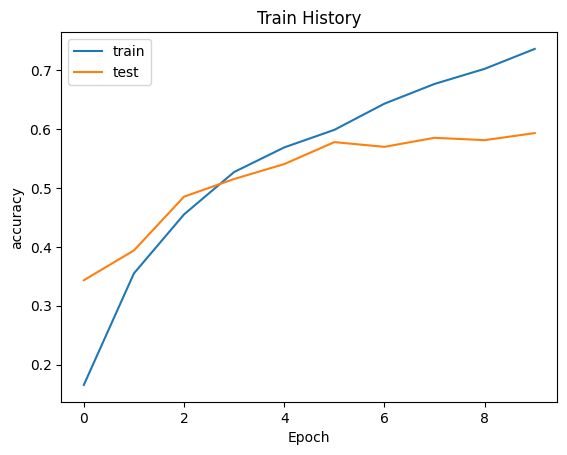

In [194]:
show_train_history('accuracy','val_accuracy')

accuracy:訓練時的準確率

val accuracy:驗證時的準確率

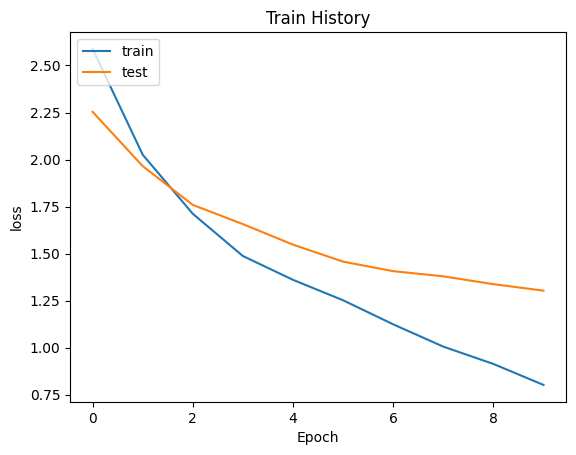

In [195]:
show_train_history('loss','val_loss')

loss:訓練時的誤差

val accuracy:驗證時的誤差

# 評估模型準確率

In [196]:
scores = model.evaluate(x_img_train_selected, 
                        y_label_train_selected_OneHot, verbose=0)
scores[1]

0.795199990272522

# 進行預測

In [234]:
prediction=np.argmax(model.predict(x_img_test_selected), axis=-1)

47/47 [==============================] - 0s 3ms/step


In [235]:
prediction[:15]

array([14, 10,  8, 11, 14,  4,  6,  9,  2,  1, 10,  6,  6, 13,  7])

# 查看預測結果

In [236]:
label_dict={0: 'apple',
            1: 'aquarium_fish',
            2: 'baby',
            3: 'bear',
            4: 'beaver',
            5: 'bed',
            6: 'bee',
            7: 'beetle',
            8: 'bicycle',
            9: 'bottle',
            10: 'bowl',
            11: 'boy',
            12: 'bridge',
            13: 'bus',
            14: 'butterfly'
            }

In [237]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25  # difine the showed-image max
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
        try:       
          title=str(i)+','+label_dict[labels[i][0]]
          if len(prediction)>0:
              title+='=>'+label_dict[prediction[i]]
              
          ax.set_title(title,fontsize=10) 
        except:
          None
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

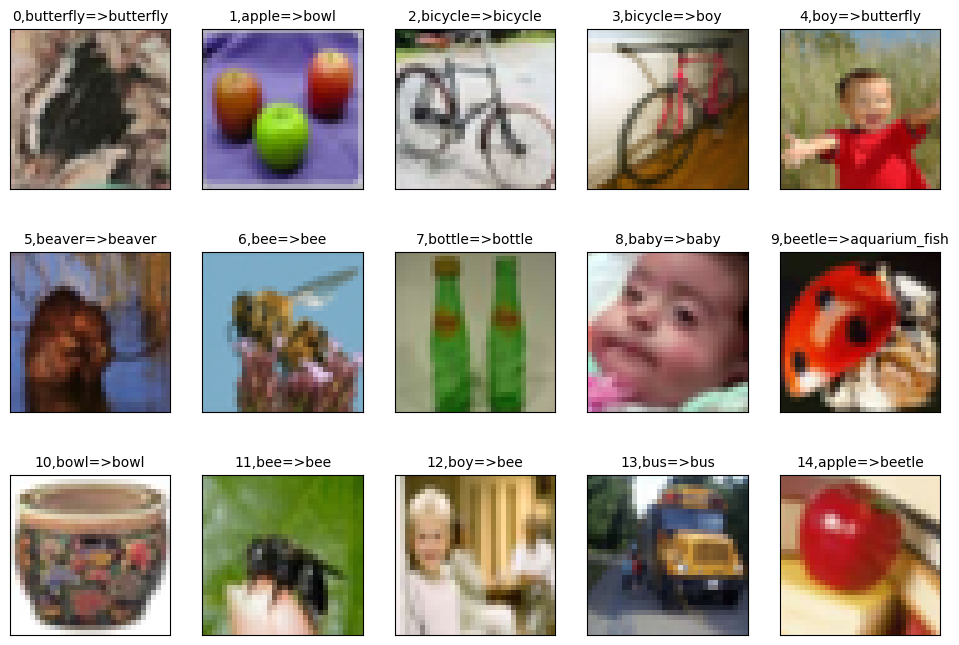

In [238]:
plot_images_labels_prediction(x_img_test_selected,
                              y_label_test_selected,
                              prediction,
                              0,
                              15)

# 查看預測機率

In [239]:
Predicted_Probability=model.predict(x_img_test_selected)

47/47 [==============================] - 0s 3ms/step


In [240]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: butterfly predict: butterfly


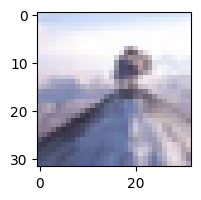

apple Probability:0.000137472
aquarium_fish Probability:0.000083222
baby Probability:0.002630940
bear Probability:0.260554612
beaver Probability:0.138400465
bed Probability:0.004930145
bee Probability:0.020625936
beetle Probability:0.146397486
bicycle Probability:0.012852089
bottle Probability:0.002910978


In [241]:
show_Predicted_Probability(y_label_test_selected,prediction,
                           x_img_test_selected,Predicted_Probability,0)

label: bicycle predict: boy


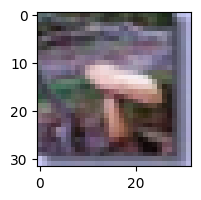

apple Probability:0.023631113
aquarium_fish Probability:0.002862953
baby Probability:0.124004707
bear Probability:0.056975026
beaver Probability:0.092907123
bed Probability:0.011866055
bee Probability:0.135450378
beetle Probability:0.031459473
bicycle Probability:0.090483509
bottle Probability:0.123536430


In [242]:
show_Predicted_Probability(y_label_test_selected,prediction,
                           x_img_test_selected,Predicted_Probability,3)

# confusion matrix

In [251]:
prediction.shape

(1500,)

建立混淆矩陣時結果資據必須為1維陣列,如果括號有多於一筆數據,則必須先進行數據處理

In [250]:
y_label_test_selected.shape

(1500, 1)

執行結果顯示已轉換為1維陣列

In [252]:
y_label_test_selected

array([[14],
       [ 0],
       [ 8],
       ...,
       [14],
       [ 7],
       [14]])

In [248]:
y_label_test_selected.reshape(-1)

array([14,  0,  8, ..., 14,  7, 14])

In [256]:
import pandas as pd
confusion_matrix = pd.crosstab(y_label_test_selected.reshape(-1),
                               prediction,
                               rownames=['label'], 
                               colnames=['predict'])

In [255]:
confusion_matrix

predict,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
label,,,,,,,,,,,,,,,
0,83,2,2,0,1,0,0,3,1,2,1,0,1,0,4
1,5,66,3,2,2,1,2,1,3,0,3,2,0,2,8
2,6,3,52,2,1,12,4,0,3,4,4,6,0,1,2
3,0,0,2,56,18,1,3,6,2,3,1,0,2,2,4
4,0,0,2,16,61,2,5,7,2,0,0,3,0,0,2
5,3,4,2,0,4,68,2,2,4,2,2,0,2,3,2
6,0,1,2,3,6,1,59,4,3,2,0,2,0,4,13
7,0,1,2,4,4,0,9,62,5,0,0,0,0,0,13
8,1,2,1,5,2,0,1,2,75,1,0,1,8,0,1


匯入pandas模組

reshape(-1)轉換1維陣列

測試資料的預測結果

設定行的名稱label

設定列的名稱是predict

In [233]:
print(label_dict)

{0: 'apple', 1: 'aquarium_fish', 2: 'baby', 3: 'bear', 4: 'beaver', 5: 'bed', 6: 'bee', 7: 'beetle', 8: 'bicycle', 9: 'bottle', 10: 'bowl', 11: 'boy', 12: 'bridge', 13: 'bus', 14: 'butterfly'}


# Save model to Google Drive

In [257]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Save model to JSON

In [259]:
import os
try:
  os.makedirs('/content/Save/')
except:
  print("File existed")

In [260]:
model_json = model.to_json()
with open("/content/Save/cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)

# Save Weight to h5 

In [261]:
model.save_weights("/content/Save/cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk
